In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df = pd.read_csv("laptopData.csv")

In [3]:
print(df.head())
print(df.info())
print(df.describe(include="all"))


   Unnamed: 0 Company   TypeName Inches                    ScreenResolution  \
0         0.0   Apple  Ultrabook   13.3  IPS Panel Retina Display 2560x1600   
1         1.0   Apple  Ultrabook   13.3                            1440x900   
2         2.0      HP   Notebook   15.6                   Full HD 1920x1080   
3         3.0   Apple  Ultrabook   15.4  IPS Panel Retina Display 2880x1800   
4         4.0   Apple  Ultrabook   13.3  IPS Panel Retina Display 2560x1600   

                          Cpu   Ram               Memory  \
0        Intel Core i5 2.3GHz   8GB            128GB SSD   
1        Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3        Intel Core i7 2.7GHz  16GB            512GB SSD   
4        Intel Core i5 3.1GHz   8GB            256GB SSD   

                            Gpu  OpSys  Weight        Price  
0  Intel Iris Plus Graphics 640  macOS  1.37kg   71378.6832  
1        Intel HD Graphics 6000  macOS  

In [4]:
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

In [5]:
def weight_to_kg(x):
    if pd.isna(x): return np.nan
    s = str(x).lower().strip().replace(',', '.')
    m = re.search(r'(\d+(\.\d+)?)', s)
    if not m: return np.nan
    val = float(m.group(1))
    if ('g' in s) and ('kg' not in s): return val / 1000.0
    return val
df['Weight'] = df['Weight'].apply(weight_to_kg)


df['Ram'] = df['Ram'].str.replace('GB','').astype(int)


df['Price'] = pd.to_numeric(df['Price'], errors='coerce')



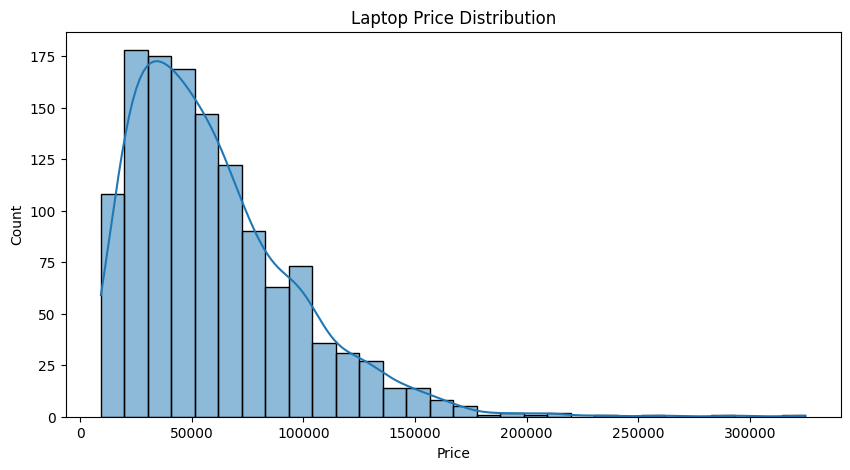

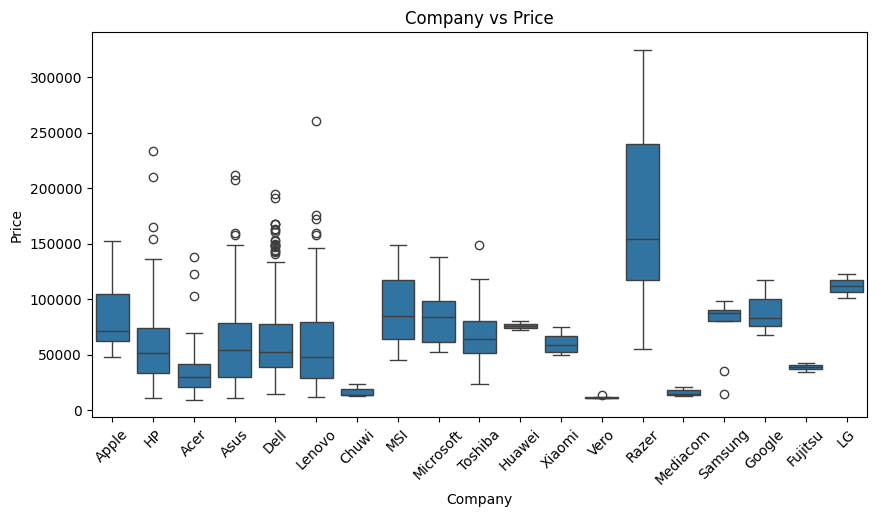

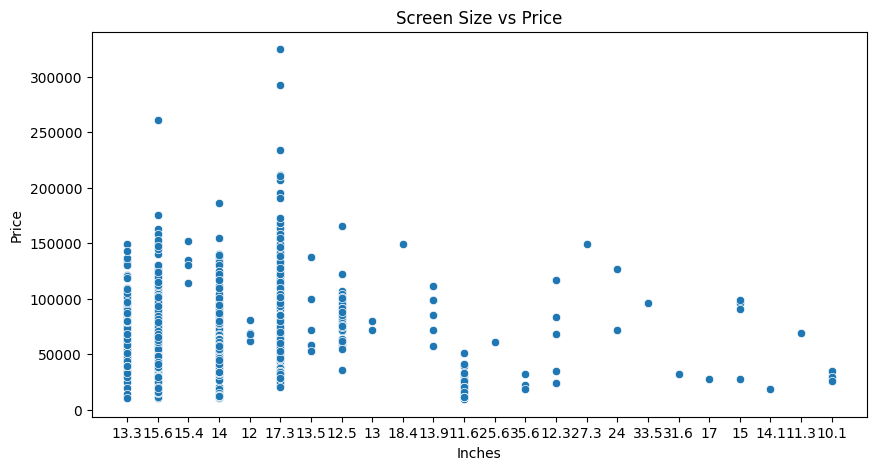

In [6]:
plt.figure(figsize=(10,5))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title("Laptop Price Distribution")
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x="Company", y="Price", data=df)
plt.xticks(rotation=45)
plt.title("Company vs Price")
plt.show()

plt.figure(figsize=(10,5))
sns.scatterplot(x="Inches", y="Price", data=df)
plt.title("Screen Size vs Price")
plt.show()


In [7]:
cat_cols = ['Company','TypeName','ScreenResolution','Cpu','Memory','Gpu','OpSys']
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))


In [8]:
X = df.drop("Price", axis=1)
y = df["Price"]


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# STEP 11: Train Models
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Linear Regression R2:", r2_score(y_test, y_pred_lr))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest R2:", r2_score(y_test, y_pred_rf))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))


Linear Regression R2: 0.5756356169839696
Linear Regression RMSE: 21722.19865823538
Random Forest R2: 0.8552110166631703
Random Forest RMSE: 12688.260232768931


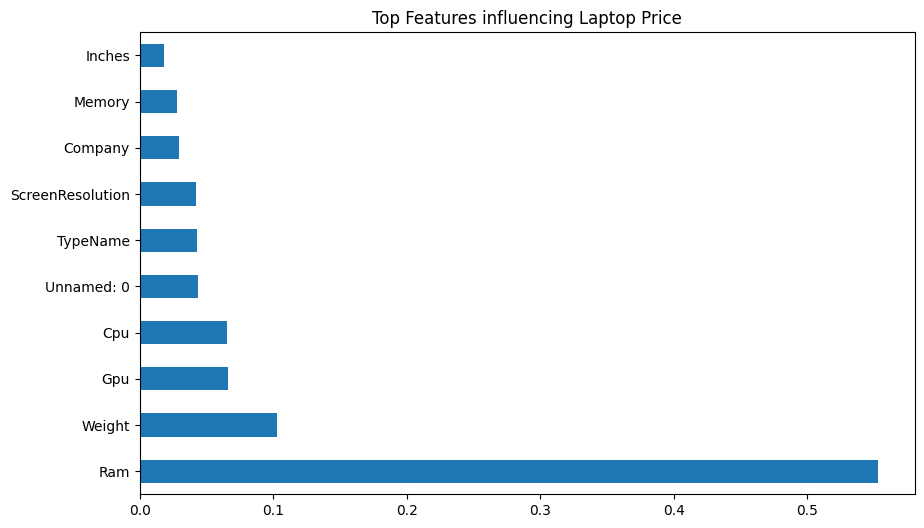

In [13]:
# STEP 12: Feature Importance (Random Forest)
feat_importances = pd.Series(rf.feature_importances_, index=df.drop("Price", axis=1).columns)
feat_importances.nlargest(10).plot(kind='barh', figsize=(10,6))
plt.title("Top Features influencing Laptop Price")
plt.show()